# Susana Valentina Valencia - 63192043
# Laura Sofia Oyola Morales - 63192001

1. **Leer** **la tabla del csv desde google shets, se hizo para mayor facilidad de lectura.**

In [ ]:
import pandas as pd

#lee la base de datos
data_set = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vTV-suRQ2Wa43ty1TqWgQp__u8Fa71CJjR3XMlqubpN4c8WNTBBCbkIC_cMvxyFBy4pJkF6sw_qZpRg/pub?gid=1970058776&single=true&output=csv')
#imprime la base de datos
data_set.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,Complain,AcceptedCmps
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,635,88,546,172,88,88,8,10,4,no,0
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,11,1,6,2,1,6,1,1,2,no,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,426,49,127,111,21,42,8,2,10,no,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,11,4,20,10,3,5,2,0,4,no,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,173,43,118,46,27,15,5,3,6,no,0


2. **Creacion** **de** **Graficos** **(HISTOGRAMAS)**

graduation    1115
phd            479
master         364
2n cycle       200
basic           54
Name: Education, dtype: int64


<Axes: >

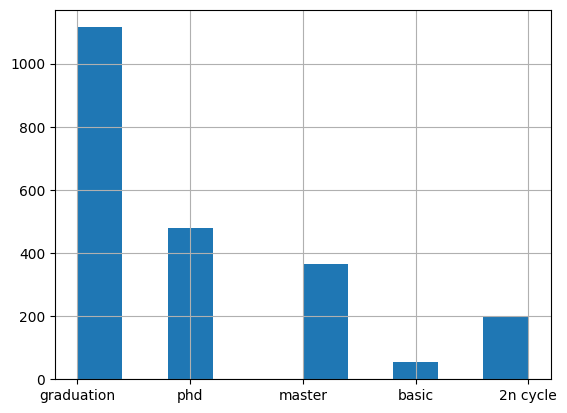

In [ ]:
#histograma de educacion
print(data_set['Education'].value_counts())
data_set['Education'].hist()



married     857
together    573
single      471
divorced    232
widow        76
alone         3
absurd        2
Name: Marital_Status, dtype: int64


<Axes: >

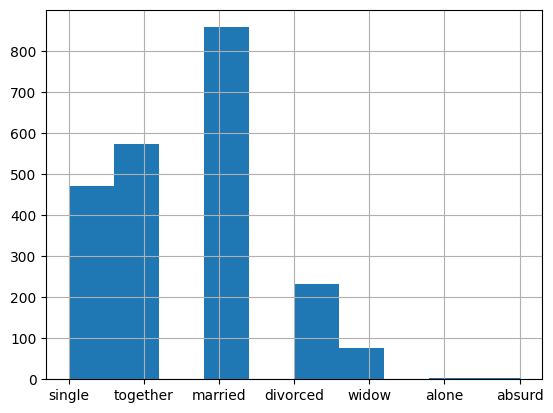

In [ ]:
##histograma de Marital_Status
print(data_set['Marital_Status'].value_counts())
data_set['Marital_Status'].hist()

<Axes: >

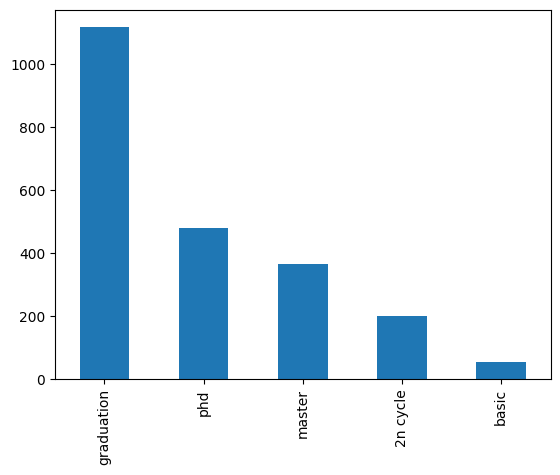

In [ ]:
#Categórica de barras
data_set['Education'].value_counts().plot(kind='bar')

<Axes: >

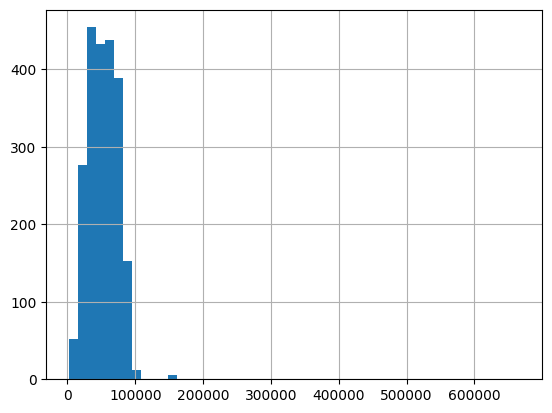

In [ ]:
mdf['Income'].hist(bins=50)

**3**. **Agrupar y segmentar datos**

In [ ]:
import pandas as pd
mdf = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vTV-suRQ2Wa43ty1TqWgQp__u8Fa71CJjR3XMlqubpN4c8WNTBBCbkIC_cMvxyFBy4pJkF6sw_qZpRg/pub?gid=1970058776&single=true&output=csv')


In [ ]:
print(mdf.columns)


Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'Complain', 'AcceptedCmps'],
      dtype='object')


In [ ]:
mdf['edad'] = 2023 - mdf['Year_Birth']
mdf['edad'].describe()

count    2240.000000
mean       54.194196
std        11.984069
min        27.000000
25%        46.000000
50%        53.000000
75%        64.000000
max       130.000000
Name: edad, dtype: float64

In [ ]:
def function2(row):
  edad = row['edad']
  if edad <= 35:
    return 'adulto joven'
  elif edad <= 53:
    return 'adulto'
  else:
    return 'adulto mayor'

mdf['EDAD'] = mdf.apply(function2, axis=1)
mdf['EDAD'].describe()

count             2236
unique               3
top       adulto mayor
freq              1075
Name: EDAD, dtype: object

**4.Segmentacion y elimancion datos nulos**

ELIMINACION DE DATOS DUPLICADOS E IRRELEVANTES


In [ ]:
import pandas as pd
# Eliminar las filas donde Marital_Status sea YOLO o Absurd
mdf = mdf.drop(mdf[mdf['Marital_Status'].isin(['YOLO', 'Absurd','edad','ID'])].index)


In [ ]:
import pandas as pd
# Eliminar la columna ID
mdf = mdf.drop(['ID'], axis=1)
# Eliminar las columnas cat_edad y EDAD
mdf = mdf.drop(['cat_edad', 'EDAD'], axis=1)


**GRUPO EDAD, ESTADO CIVIL Y VINOS**

In [ ]:
# groupby
mdf.groupby(['EDAD', 'Marital_Status']).agg({'MntWines':'mean'})

MntWines
EDAD         Marital_Status            
adulto       Alone            15.000000
             Divorced        272.877551
             Married         253.839729
             Single          229.147826
             Together        254.817121
             Widow           204.615385
adulto joven Alone             5.000000
             Divorced          7.333333
             Married         227.023810
             Single          321.566038
             Together        411.100000
adulto mayor Alone           534.000000
             Divorced        370.992366
             Married         360.857520
             Single          348.487310
             Together        344.056106
             Widow           402.718750

###### Los clientes mayores tienden a gastar más en vinos que los clientes más jóvenes. Esto podría deberse a que los clientes mayores tienen un mayor poder adquisitivo
###### Por otro lado, se puede observar que hay una relación positiva entre el estado civil y el monto gastado en vinos, es decir, que los clientes casados o en pareja tienden a gastar más en vinos que los clientes solteros, divorciados o viudos. Esto podría deberse a que los clientes casados o en pareja tienen un mayor consumo social de vinos, un mayor aprecio por los productos de calidad o una mayor confianza en la empresa.



**GRUPO EDAD, ESTADO CIVIL E INGRESOS**

In [ ]:
# groupby
mdf.groupby(['EDAD', 'Marital_Status']).agg({'Income':'mean'})

Income
EDAD         Marital_Status              
adulto       Alone           35860.000000
             Divorced        51527.255102
             Married         47760.990909
             Single          46150.207965
             Together        52066.695652
             Widow           47363.076923
adulto joven Alone           34176.000000
             Divorced        19115.333333
             Married         42005.121951
             Single          53333.132075
             Together        56080.250000
adulto mayor Alone           61331.000000
             Divorced        54584.152672
             Married         57423.566489
             Single          56053.161458
             Together        54050.706667
             Widow           58363.142857

##### La poblacion  mayor tiende a tener un mayor ingreso anual que los clientes más jóvenes. Esto podría deberse a que la poblacion mayor tienen una mayor experiencia laboral, una mayor estabilidad financiera o una mayor educación.
##### También se puede observar que hay una relación negativa entre el número de hijos en casa y el ingreso anual, es decir, que los clientes que tienen hijos pequeños o adolescentes en casa tienden a tener un menor ingreso anual que los clientes que no los tienen. Esto podría deberse a que los clientes con hijos en casa tienen más gastos familiares, menos oportunidades laborales o menos incentivos económicos.
##### Por otro lado, se puede observar que hay una relación positiva entre el estado civil y el ingreso anual, es decir, que la poblacion casada o en pareja tienden a tener un mayor ingreso anual que los clientes solteros, divorciados o viudos. Esto podría deberse a que los clientes casados o en pareja tienen un mayor apoyo emocional, un mayor ahorro conjunto o una mayor complementariedad de ingresos.

In [ ]:
from statistics import mode

**GRUPO EDAD, EDUCACION Y NUMERO DE HIJOS**


In [ ]:
mdf.pivot_table(index=['EDAD', 'Education'], values='Kidhome', aggfunc=mode)

Kidhome
EDAD         Education          
adulto       2n Cycle          1
             Basic             1
             Graduation        1
             Master            1
             PhD               0
adulto joven 2n Cycle          1
             Basic             1
             Graduation        0
             Master            0
             PhD               0
adulto mayor 2n Cycle          0
             Basic             0
             Graduation        0
             Master            0
             PhD               0

###### La poblacion más jóven tiende a tener más hijos pequeños en casa que los adultos  mayores. Esto podría deberse a que los  jóvenes están en una etapa más reproductiva, o a que los clientes más mayores ya han criado a sus hijos y estos se han independizado.
###### También se puede observar que hay una relación negativa entre el nivel educativo y el número de hijos pequeños en casa, es decir, que los clientes con un mayor nivel educativo tienden a tener menos hijos pequeños en casa que los clientes con un menor nivel educativo. Esto podría deberse a que los clientes con un mayor nivel educativo tienen más oportunidades laborales, más ingresos o más aspiraciones personales, y por lo tanto deciden tener menos hijos o postergar su maternidad o paternidad.
##### Por otro lado, se puede observar que hay algunas excepciones a estas tendencias generales, como por ejemplo los clientes adultos jóvenes con un nivel educativo de Graduation o Master, que tienen en promedio 0 hijos pequeños en casa. Esto podría deberse a que estos clientes son una muestra muy pequeña o poco representativa, o a que tienen otras características o circunstancias particulares que influyen en su decisión de tener o no hijos.

GRUPO EDAD, ESTADO CIVIL Y # DE HIJOS

In [ ]:
mdf.pivot_table(index=['EDAD', 'Marital_Status'], values='Kidhome', aggfunc=mode)

Kidhome
EDAD         Marital_Status         
adulto       Alone                 1
             Divorced              1
             Married               1
             Single                1
             Together              1
             Widow                 0
adulto joven Alone                 1
             Divorced              0
             Married               0
             Single                0
             Together              0
adulto mayor Alone                 1
             Divorced              0
             Married               0
             Single                0
             Together              0
             Widow                 0

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_2, *['Kidhome'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_3, *['Kidhome'], **{})
chart

###### La poblacion más jóven tiende a tener más hijos pequeños en casa que los adultos  mayores. Esto podría deberse a que los clientes más jóvenes están en una etapa más reproductiva, o a que los clientes más mayores ya han criado a sus hijos y estos se han independizado.


**GRUPO EDAD NIVEL DE EDUCACION Y NIVEL DE INGRESOS**

In [ ]:
mdf.pivot_table(index=['EDAD', 'Education'], values='Income', aggfunc=mode)

Income
EDAD         Education          
adulto       2n Cycle     7500.0
             Basic       24594.0
             Graduation   7500.0
             Master      46098.0
             PhD         35860.0
adulto joven 2n Cycle    23331.0
             Basic       24279.0
             Graduation  18929.0
             Master      10979.0
             PhD         67546.0
adulto mayor 2n Cycle    78497.0
             Basic       28249.0
             Graduation  18690.0
             Master      63841.0
             PhD         82800.0

##### El nivel de educación tiene una influencia significativa en los ingresos. En general, los que tienen un título de máster o doctorado ganan más que los que tienen un nivel de educación más bajo.
##### La edad también afecta a los ingresos. Los adultos mayores tienen los ingresos más altos en promedio, seguidos de los adultos jóvenes y los adultos. Esto puede deberse a la experiencia laboral, la antigüedad o la jubilación.
##### Hay una gran variación en los ingresos dentro de cada grupo de edad y educación. Por ejemplo, los adultos con un título de graduación ganan lo mismo que los que tienen un 2n ciclo, pero menos que los que tienen un nivel básico. Los adultos jóvenes con un título de doctorado ganan casi el doble que los que tienen un título de máster.

**CORRELACION**

<ipython-input-87-afdc84266f40>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(mdf.corr())


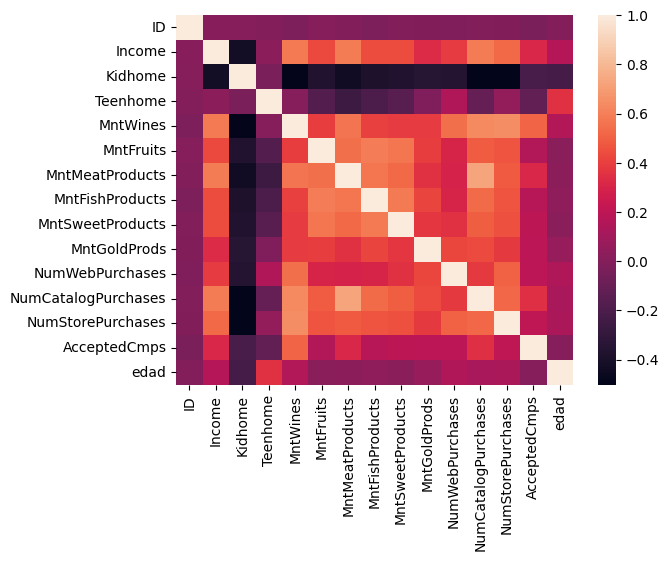

In [ ]:
# análisis de correlación
sns.heatmap(mdf.corr())
data_set = data_set.drop(['ID'], axis=1)

La variable Income tiene una correlación positiva moderada con las variables MntWines, MntMeatProducts, MntFishProducts, MntGoldProds, NumWebPurchases, NumCatalogPurchases, y NumStorePurchases. Esto sugiere que a mayor ingreso, mayor es el gasto en estos productos y el número de compras por diferentes canales.
La variable Kidhome tiene una correlación negativa moderada con las mismas variables que Income, lo que implica que a mayor número de niños en el hogar, menor es el gasto en estos productos y el número de compras.
La variable Teenhome tiene una correlación negativa débil con las mismas variables que Income y Kidhome, lo que indica que a mayor número de adolescentes en el hogar, menor es el gasto en estos productos y el número de compras, pero con menos intensidad que los niños.